In [9]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os
import numpy as np

%matplotlib notebook

In [22]:
lst = []
with open('W1_40_tup_05tdown.txt') as f:
    for line in f:
#         print(line)
        nup = re.search(r'(?<==)[\d\.-]+', line).group()
        ndown, e, w, l = re.findall(r'(?<== )[\d\.-]+', line)
#         print(nup, ndown, e, w, l)
        lst.append({'Nup':float(nup), 'Ndown':float(ndown), 'E':float(e)})
#         {'Nup': }
#         break
df = pd.DataFrame(lst)

In [42]:
l = list(range(2,39))

In [43]:
i = 2
df[(df['Nup']==i+1) & (df['Ndown']==1)]

,Nup,Ndown,E
82,3.0,1.0,-11.566839


In [46]:
e11 = df[(df['Nup']==1) & (df['Ndown']==1)]['E'].values[0]
e10 = df[(df['Nup']==39) & (df['Ndown']==0)]['E'].values[0]

In [44]:
mu1, h1 = [], []
for i in l:
#     print(i)
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/2
    h = (df[(df['Nup']==i-1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/-2
    mu1.append(mu)
    h1.append(h)

In [45]:
mu_, h_ = [], []
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==i+1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    h = (df[(df['Nup']==i+1) & (df['Ndown']==i-1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    mu_.append(mu)
    h_.append(h)

In [31]:


def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

# h = np.arange(h1[0], 10, 0.1)
# h3 = np.arange(6.5, 10, 0.1)

<IPython.core.display.Javascript object>


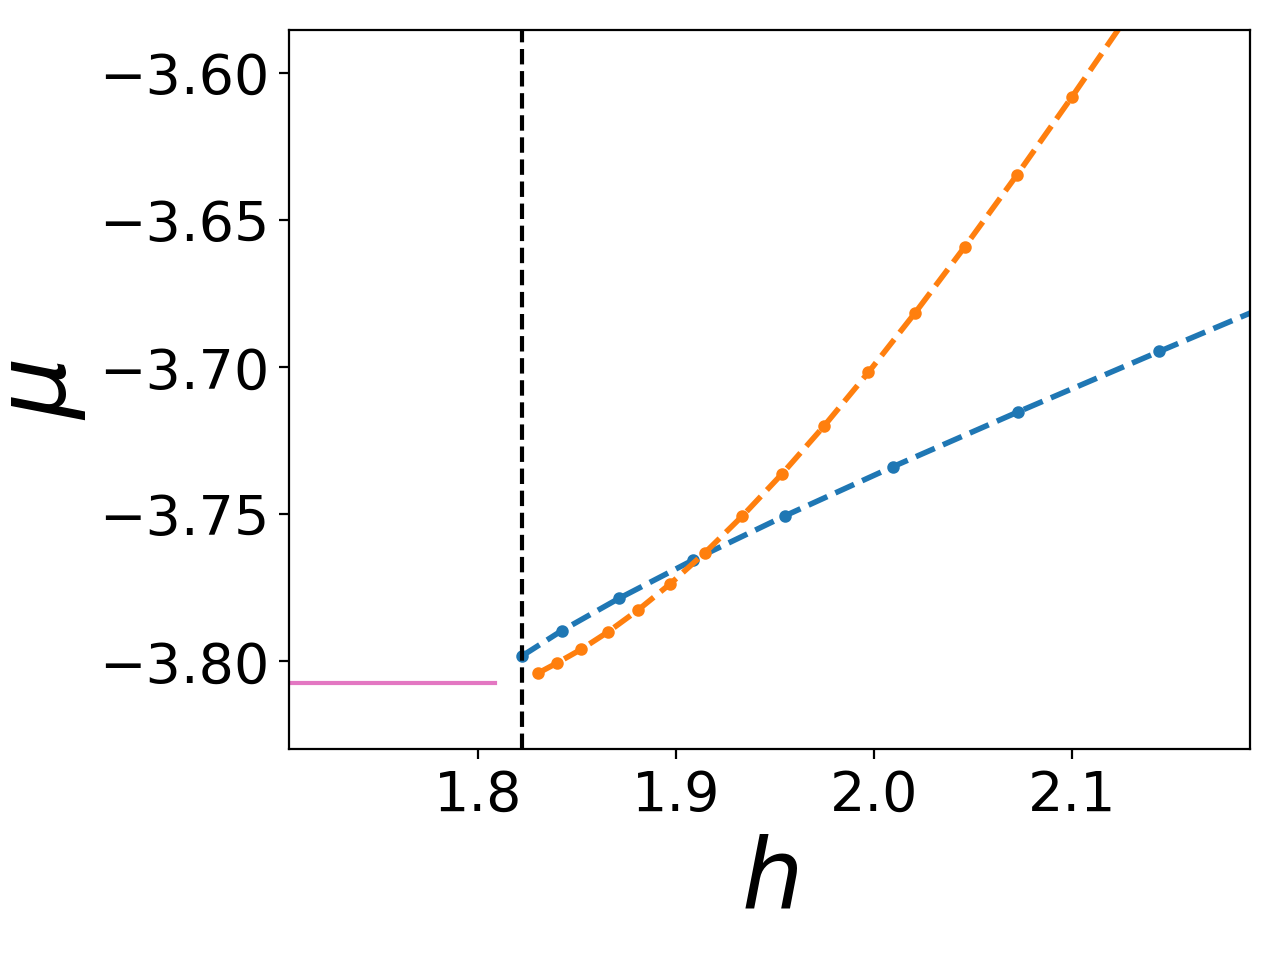

In [47]:
kwds = dict(ls='--', marker='.', lw=2, markersize=7)
plt.plot(h1, mu1, '-', color='#1f77b4', **kwds)
plt.plot(h_, mu_, color='#ff7f0e', **kwds)
plt.axhline(y=(e11/2), color='#e377c2', xmax = h1[0]/8.5, ls='-') 
plt.axvline(x=h1[0], color='black', ls='--')
# plt.plot(h, mu(h), '-', color = '#2ca02c', ls='-')
# plt.plot(h3, mu3(h3), '-', color = '#d62728')
# plt.axis([0, 9, -4.95, -3.5])
# plt.text(0.2, -3.9, r'$ED$', fontsize=35, color='darkblue')
# plt.text(0.1, -4.85, r'$N_{\uparrow} = 0$', fontsize=20, color='darkblue')
# plt.text(0.1, -4.95, r'$N_{\downarrow} = 0$', fontsize=20, color='darkblue')
# plt.text(0.3, -4.75, r'$V$', fontsize=35, color='darkblue')
# plt.text(3.6, -4.0, r'$PP$', fontsize=35, color='darkblue')
# plt.text(3.6, -4.75, r'$FP_1$', fontsize=35, color='darkblue')
# plt.text(7.8, -3.9, r'$FP_2$', fontsize=35, color='darkblue')
plt.xlabel('$h$', fontsize=35)
plt.ylabel(r'$\mu$', fontsize=35)
plt.gca().xaxis.set_tick_params(labelsize=20)
plt.gca().yaxis.set_tick_params(labelsize=20)
plt.tight_layout()